In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import geopy
import utm

In [2]:
%matplotlib inline

In [3]:
tri_df = pd.read_csv('Resources/tri_df.csv')

In [4]:
tri_df.head()

,Unnamed: 0,Latitude,Longitude,Company,Facility,Facility ID,Address,City,County,State,Zip
0,1,45.0205,-92.4631,ANDERSEN CORP,ANDERSEN CORP,55003NDRSNFOOTO,100 4TH AVE N,BAYPORT,WASHINGTON,MN,55003
1,2,45.0149,-92.4643,XCEL ENERGY,XCEL ENERGY A S KING GENERATING PLANT,55003SKNGG1103K,1103 KING RD,BAYPORT,WASHINGTON,MN,55003
2,3,45.3407,-93.1309,WATER WORKS MANUFACTURING,CAMBRIDGE METALS and PLASTICS,55008CMBRD500SC,500 S CLEVELAND,CAMBRIDGE,ISANTI,MN,55008
3,4,45.3345,-93.1312,NaN,CANADIAN HARVEST USA,55008CNDNH1001S,1001 S CLEVELAND ST,CAMBRIDGE,ISANTI,MN,55008
4,6,45.3451,-93.1255,NaN,ARROW TANK and ENGINEERING CO,55008RRWTN650NO,650 N EMERSON,CAMBRIDGE,ISANTI,MN,55008


In [5]:
tri_df.describe(include='all')

,Unnamed: 0,Latitude,Longitude,Company,Facility,Facility ID,Address,City,County,State,Zip
count,1007.000000,1007.000000,1007.000000,295,1007,1007,1007,1007,1007,1007,1.007000e+03
unique,NaN,NaN,NaN,216,939,1007,999,236,77,1,NaN
top,NaN,NaN,NaN,HORMEL FOODS CORP,ASSOCIATED MILK PRODUCERS INC,55121GPHRS3385S,12130 LYNN AVE S,MINNEAPOLIS,HENNEPIN,MN,NaN
freq,NaN,NaN,NaN,6,4,1,2,100,244,1007,NaN
mean,626.099305,44.856089,-93.431925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.686911e+07
std,355.889793,0.855953,0.944426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.542606e+08
min,1.000000,43.303000,-97.560100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.500300e+04
25%,321.500000,44.465600,-93.572250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.531700e+04
50%,624.000000,44.582300,-93.205400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.542800e+04
75%,922.500000,45.072800,-93.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.614950e+04


In [6]:
file = 'boundaries/bdry_school_attendance_areas.gdb'
shp_df = gpd.read_file(file)

In [7]:
tri_length = len(tri_df['Latitude'])
tri_length

1007

In [8]:
lat = tri_df['Latitude'][1]
lng = tri_df['Longitude'][1]
print(lat, lng)

45.0149 -92.4643


In [9]:
utm.from_latlon(lat, lng)

(542210.4105705898, 4984745.174006095, 15, 'T')

In [10]:
utm_save = []

for lat_lng in tri_df.index:
    lat = tri_df['Latitude'][lat_lng]
    lng = tri_df['Longitude'][lat_lng]
    print(lat, lng)
    current = utm.from_latlon(lat, lng)
    print(current)
    utm_save.append(current)


45.0205 -92.4631
(542300.8410042864, 4985367.890990298, 15, 'T')
45.0149 -92.4643
(542210.4105705898, 4984745.174006095, 15, 'T')
45.3407 -93.1309
(489744.4029225176, 5020807.318728867, 15, 'T')
45.3345 -93.1312
(489719.77706151444, 5020118.574684268, 15, 'T')
45.3451 -93.1255
(490168.237286967, 5021295.459080696, 15, 'T')
45.3416 -93.1258
(490144.1277850209, 5020906.666641817, 15, 'T')
44.31100000000001 -92.5411
(536599.1819000769, 4906518.255888615, 15, 'T')
44.3106 -92.5413
(536583.4795366834, 4906473.737079866, 15, 'T')
44.3114 -92.5418
(536543.1057531877, 4906562.373352268, 15, 'T')
44.3108 -92.5403
(536663.1097689831, 4906496.39839104, 15, 'T')
44.4736 -92.54
(536585.4706615556, 4924579.629778071, 15, 'T')
44.4719 -92.5415
(536467.2288090208, 4924390.128770629, 15, 'T')
44.174 -93.155
(487609.3876468608, 4891210.612127488, 15, 'T')
44.1736 -93.1736
(486122.42022870097, 4891169.154785122, 15, 'T')
44.1728 -93.1602
(487193.4428666309, 4891078.123461613, 15, 'T')
44.1929 -93.175
(48

44.523 -93.223
(482278.9718003631, 4929988.150110272, 15, 'T')
44.521 -93.2115
(483192.26154665527, 4929763.564362767, 15, 'T')
44.52 -93.21
(483311.17991459393, 4929652.178949558, 15, 'T')
44.5139 -93.2033
(483841.94714106666, 4928973.257225616, 15, 'T')
44.5154 -93.2003
(484080.7921183387, 4929139.285246533, 15, 'T')
44.52 -93.213
(483072.7681789209, 4929652.796018041, 15, 'T')
44.535 -93.2355
(481289.482599241, 4931323.874721768, 15, 'T')
44.51 -93.21
(483308.3255883366, 4928541.400293465, 15, 'T')
44.4811 -93.22200000000001
(482345.7981963986, 4925333.781665314, 15, 'T')
44.522 -93.2135
(483033.61333174515, 4929875.055679933, 15, 'T')
45.0013 -93.1336
(489470.5145028608, 4983103.494712908, 15, 'T')
44.5615 -93.2118
(483180.0853741838, 4934262.300413889, 15, 'T')
45.0015 -93.2718
(478578.5612689189, 4983152.96031637, 15, 'T')
45.0044 -93.25399999999999
(479982.44687606173, 4983470.561894438, 15, 'T')
44.5931 -93.3255
(474164.6925981023, 4937802.107098033, 15, 'T')
45.0 -93.3
(476355

In [11]:
utm_save

[(542300.8410042864, 4985367.890990298, 15, 'T'),
 (542210.4105705898, 4984745.174006095, 15, 'T'),
 (489744.4029225176, 5020807.318728867, 15, 'T'),
 (489719.77706151444, 5020118.574684268, 15, 'T'),
 (490168.237286967, 5021295.459080696, 15, 'T'),
 (490144.1277850209, 5020906.666641817, 15, 'T'),
 (536599.1819000769, 4906518.255888615, 15, 'T'),
 (536583.4795366834, 4906473.737079866, 15, 'T'),
 (536543.1057531877, 4906562.373352268, 15, 'T'),
 (536663.1097689831, 4906496.39839104, 15, 'T'),
 (536585.4706615556, 4924579.629778071, 15, 'T'),
 (536467.2288090208, 4924390.128770629, 15, 'T'),
 (487609.3876468608, 4891210.612127488, 15, 'T'),
 (486122.42022870097, 4891169.154785122, 15, 'T'),
 (487193.4428666309, 4891078.123461613, 15, 'T'),
 (486015.0675764502, 4893313.069853482, 15, 'T'),
 (487057.7836340483, 4891200.567959263, 15, 'T'),
 (485375.7810456631, 4893325.569284729, 15, 'T'),
 (487020.44669914217, 4892533.502650589, 15, 'T'),
 (491835.22964425007, 4914440.562313127, 15, 'T')

In [12]:
tri_df['utm'] = utm_save

In [13]:
tri_df.head()

,Unnamed: 0,Latitude,Longitude,Company,Facility,Facility ID,Address,City,County,State,Zip,utm
0,1,45.0205,-92.4631,ANDERSEN CORP,ANDERSEN CORP,55003NDRSNFOOTO,100 4TH AVE N,BAYPORT,WASHINGTON,MN,55003,"(542300.8410042864, 4985367.890990298, 15, T)"
1,2,45.0149,-92.4643,XCEL ENERGY,XCEL ENERGY A S KING GENERATING PLANT,55003SKNGG1103K,1103 KING RD,BAYPORT,WASHINGTON,MN,55003,"(542210.4105705898, 4984745.174006095, 15, T)"
2,3,45.3407,-93.1309,WATER WORKS MANUFACTURING,CAMBRIDGE METALS and PLASTICS,55008CMBRD500SC,500 S CLEVELAND,CAMBRIDGE,ISANTI,MN,55008,"(489744.4029225176, 5020807.318728867, 15, T)"
3,4,45.3345,-93.1312,NaN,CANADIAN HARVEST USA,55008CNDNH1001S,1001 S CLEVELAND ST,CAMBRIDGE,ISANTI,MN,55008,"(489719.77706151444, 5020118.574684268, 15, T)"
4,6,45.3451,-93.1255,NaN,ARROW TANK and ENGINEERING CO,55008RRWTN650NO,650 N EMERSON,CAMBRIDGE,ISANTI,MN,55008,"(490168.237286967, 5021295.459080696, 15, T)"


In [15]:
TRI_points = tri_df[['utm']].apply(lambda row: Point(row['utm']), axis=1)
TRI_geo = gpd.GeoDataFrame({"geometry": TRI_points, "geo_names": tri_df['Facility']})

In [25]:
TRI_geo.crs = {'init': 'epsg:26915'}

In [26]:
TRI_geo.head()

,geometry,geo_names
0,POINT Z (542300.8410042864 4985367.890990298 0),ANDERSEN CORP
1,POINT Z (542210.4105705898 4984745.174006095 0),XCEL ENERGY A S KING GENERATING PLANT
2,POINT Z (489744.4029225176 5020807.318728867 0),CAMBRIDGE METALS and PLASTICS
3,POINT Z (489719.7770615144 5020118.574684268 0),CANADIAN HARVEST USA
4,POINT Z (490168.237286967 5021295.459080696 0),ARROW TANK and ENGINEERING CO


In [27]:
shp_df.head()

,Shape_Length,Shape_Area,UNI_TYP,UNI_MAJ,UNI_NAM,ELEM_NAME,MIDD_NAME,HIGH_NAME,geometry
0,26178.487805,1.954316e+07,01,0000,Minneapolis-Saint Paul Intl Airport,,,,(POLYGON ((485953.9400000004 4970757.689999999...
1,274684.806259,2.129586e+09,01,0001,Aitkin,RIPPLESIDE,,AITKIN,"(POLYGON ((470301 5190700, 470698.9540999997 5..."
2,8763.507360,3.653680e+06,03,0001,Minneapolis,ANDERSEN,ANDERSEN & SANFORD,SOUTH,"(POLYGON ((480088.0308999997 4978042.0956, 480..."
3,13747.352019,7.073742e+06,03,0001,Minneapolis,ANNE SULLIVAN,ANNE SULLIVAN & SANFORD,SOUTH,(POLYGON ((480883.4464999996 4980570.381899999...
4,10637.296909,5.191875e+06,03,0001,Minneapolis,BETHUNE,FRANKLIN,NORTH,(POLYGON ((478292.0543999998 4982879.209000001...


In [28]:
grad_df = pd.read_csv("Resources/point_grad_rates.csv")
grad_df.columns

Index(['Unnamed: 0', 'UNI_TYP_left', 'UNI_MAJ_left', 'UNI_IMD', 'ORGID',
       'ORGID_NUM', 'SCHNAME', 'ADDRESS', 'CITY', 'ZIP', 'SCH_TYPE',
       'SCH_TYPE1', 'SCH_TYPE2', 'SCH_LEVEL', 'GRADE', 'CLASS', 'SDNUM',
       'SDNAME', 'CTYNUM', 'FIPSNUM', 'CTYNAME', 'MAGNET', 'DATE_ENTRY',
       'FED_SCHNUM', 'ALT_NAME', 'WEB_URL', 'YEAR', 'geometry', 'Unnamed: 0.1',
       'School Name', 'Demographic Description', 'Ending Status',
       'Four Year Percent', 'Four Year Total', 'Physical Line 1',
       'Physical City', 'Physical State', 'Physical Zip',
       'Consistent Attendance', 'index_right', 'SECSCHOOL', 'STATE',
       'BLOCKGROUP', 'BLOCK', 'TRACT', 'MCD', 'SUBMCD', 'PLACE',
       'UNI_MAJ_right', 'UNI_TYP_right', 'UNI_NAM', 'HIGH_NAME', 'MIDD_NAME',
       'ELEM_NAME', 'POPULATION'],
      dtype='object')

In [29]:
grad_gdf = gpd.GeoDataFrame({"geometry": grad_df['geometry'], "geo_names": grad_df['School Name']})

In [30]:
grad_gdf.crs = {'init': 'epsg:26915'}

In [32]:
print(shp_df.crs)

{'init': 'epsg:26915'}


In [55]:
fileschool = "boundaries/school_programs/school_program_locations.shp"
schpg_df = gpd.read_file(fileschool)
schpg_df.crs = {'init': 'epsg:26915'}

https://gisdata.mn.gov/dataset/struc-school-program-locs

In [47]:
file = 'boundaries/my_neighborhood/my_neighborhood_sites.shp'
nbh_df = gpd.read_file(file)

https://gisdata.mn.gov/dataset/env-my-neighborhood

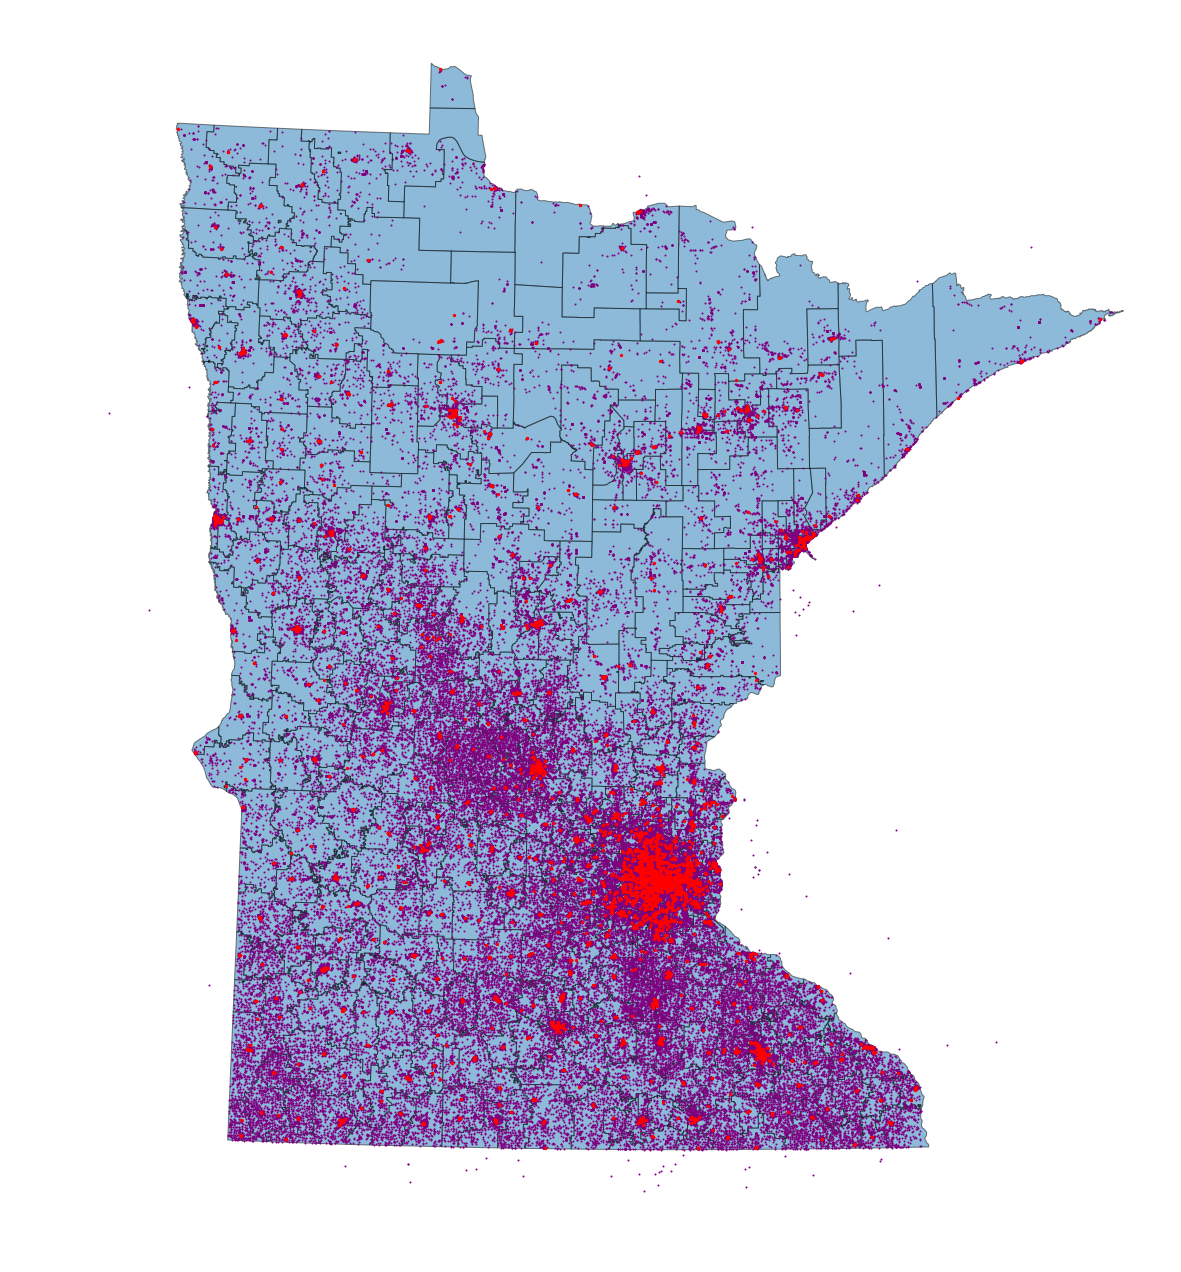

In [60]:
fig, ax = plt.subplots(1, figsize=(20,40))
base = shp_df.plot(ax=ax, alpha=0.5, edgecolor='k')
nbh_df.plot(ax=ax, marker="o", color="purple",markersize=1, label="")
schpg_df.plot(ax=base, marker="o", color="red",markersize=5)
#ax.set_ylim(4800000, 5500000)
_ = ax.axis('off')
plt.savefig('toxic_lunch.png')

In [59]:
plt.savefig('toxic_lunch.png')

<Figure size 432x288 with 0 Axes>